In [16]:
import numpy as np
import matplotlib.pyplot as plt

name_str='uniform-distribution-frequency-65-seed-{}.npz'
sample_list = np.arange(1000,1100,10)
std_w_range = np.arange(0.01,0.4,0.1)
axis_std_w1 = np.arange(0.005, 0.1, 0.015)
axis_std_w2 = np.arange(0.005, 0.1, 0.015)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
train_accuracy_10_samples = np.zeros((10,7,7))
test_accuracy_10_samples = np.zeros((10,7,7))


In [17]:
test1 = np.load('uniform-distribution-frequency-65-seed-1.npz')
print(test1['loss_hist'])

[0.89869517 0.15988366 0.11953334 0.09091131 0.07636204]


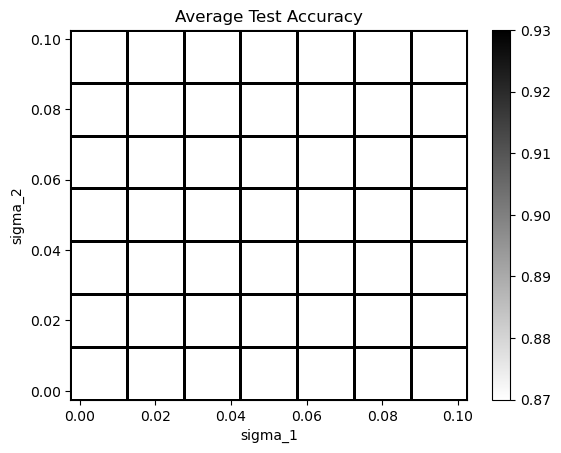

In [18]:
zeros = np.zeros((7,7))
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(axis_std_w1, axis_std_w2, zeros, cmap = 'gist_yarg', edgecolors='k', vmin=0.87, vmax=0.93)
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


fig.savefig("zeros.png")

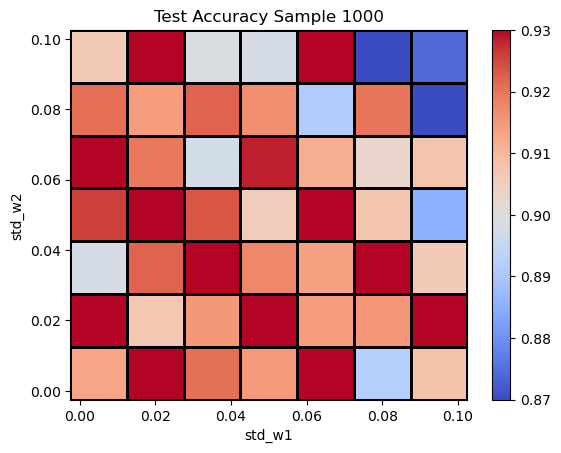

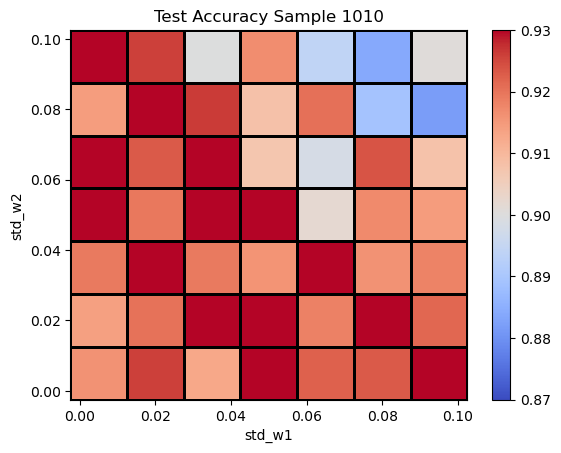

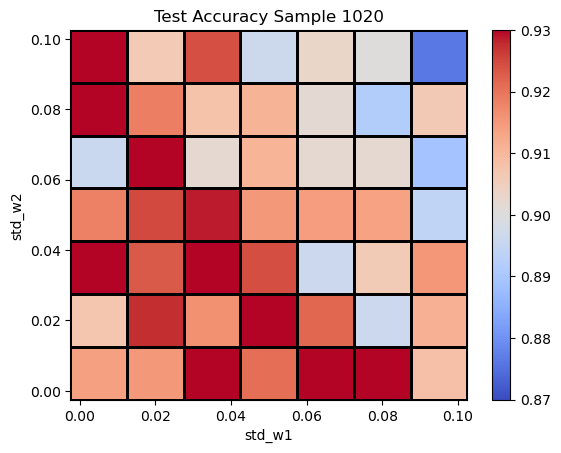

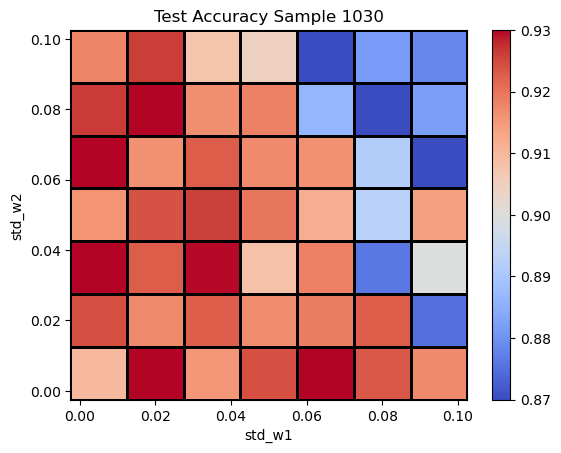

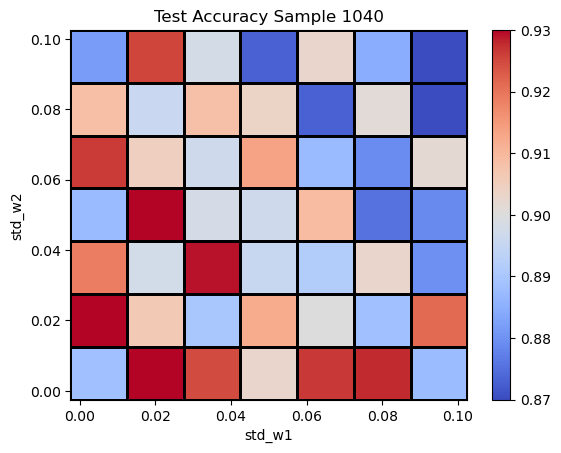

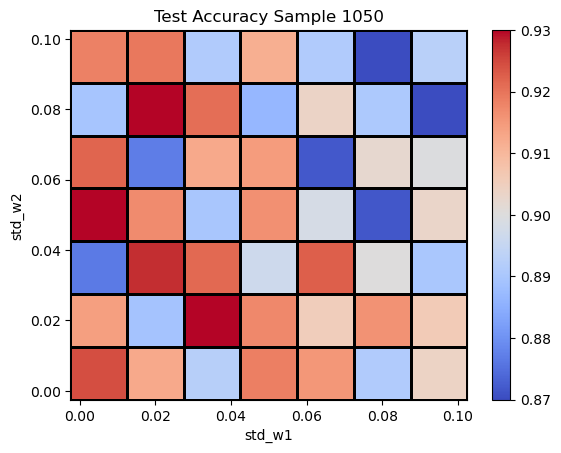

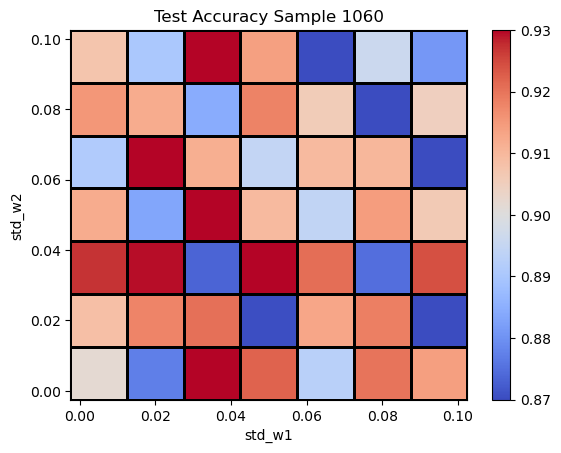

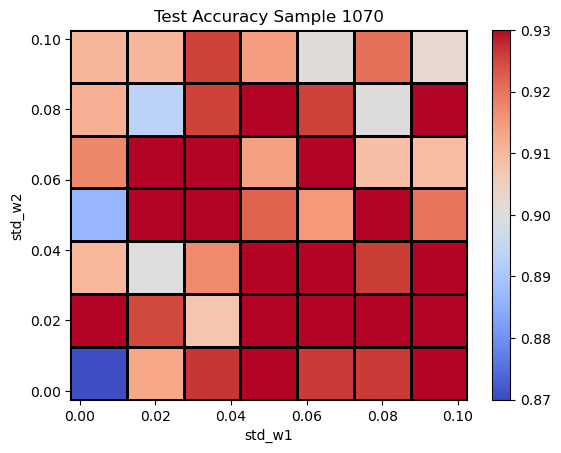

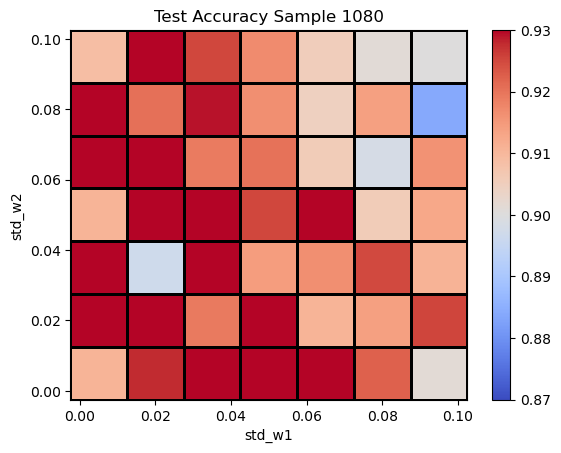

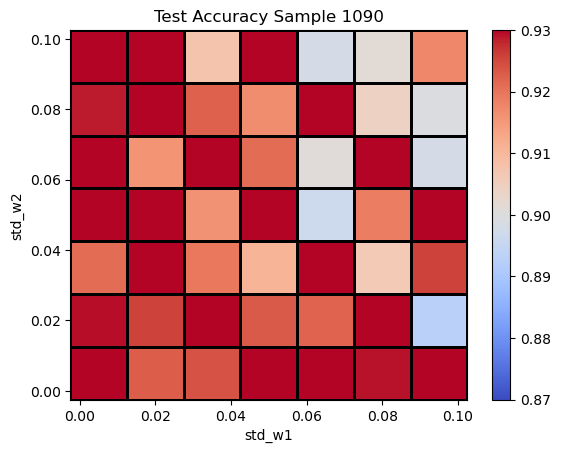

In [19]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(i))
    fig = plt.figure()
    ax = plt.axes()
    levels = np.linspace(0.87, 0.94, 10)
    b = ax.pcolormesh(axis_std_w1, axis_std_w2, data['test_accuracy_w1_w2'].T, cmap ='coolwarm', vmin=0.87, vmax=0.93, edgecolors='k')
    plt.colorbar(b)
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_title('Test Accuracy Sample {}'.format(sample))
    fig.savefig("test_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            test_accuracy_10_samples[i][j][k]= data['test_accuracy_w1_w2'][j][k]




In [20]:
average_train_accuracy_grid_10_by_10_10_samples = np.mean(train_accuracy_10_samples, axis=0)
std_dev_train_accuracy_grid_10_by_10_10_samples = np.std(train_accuracy_10_samples, axis=0)

In [21]:
average_test_accuracy_grid_10_by_10_10_samples = np.mean(test_accuracy_10_samples, axis=0)
std_dev_test_accuracy_grid_10_by_10_10_samples = np.std(test_accuracy_10_samples, axis=0)

In [22]:
average_test_accuracy_grid_10_by_10_10_samples

array([[0.90883413, 0.92582131, 0.91640625, 0.91813902, 0.92432893,
        0.91795873, 0.91744792],
       [0.92127404, 0.91758814, 0.92098357, 0.92498998, 0.91944111,
        0.92153446, 0.92078325],
       [0.92317708, 0.9220653 , 0.92230569, 0.92380809, 0.91887019,
        0.9163762 , 0.91096755],
       [0.92392829, 0.92188502, 0.91625601, 0.91867989, 0.91414263,
        0.91294071, 0.90935497],
       [0.92574119, 0.91696715, 0.91914063, 0.91077724, 0.90348558,
        0.904998  , 0.89333934],
       [0.91888021, 0.9202524 , 0.90638021, 0.90625   , 0.90546875,
        0.89253806, 0.88961338],
       [0.91596554, 0.90969551, 0.91175881, 0.90662059, 0.8940004 ,
        0.88684896, 0.88747997]])

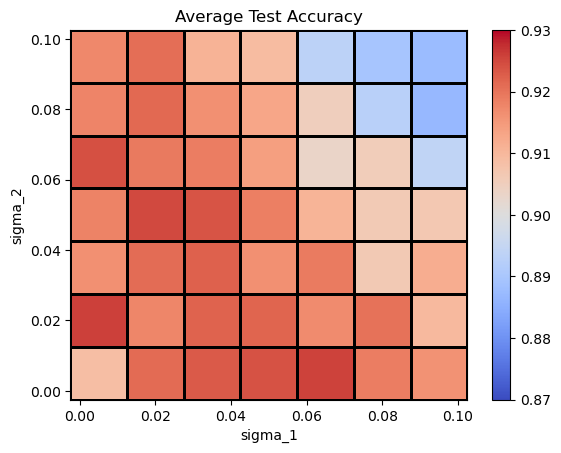

In [23]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(axis_std_w1, axis_std_w2, average_test_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm', vmin= 0.87, vmax=0.93, edgecolors='k')
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


fig.savefig("average_test_accuracy_grid_300_0.1.png".format(sample))

0.9258213141025641
0.8868489583333334


Text(0.5, 1.0, 'Average Test Accuracy')

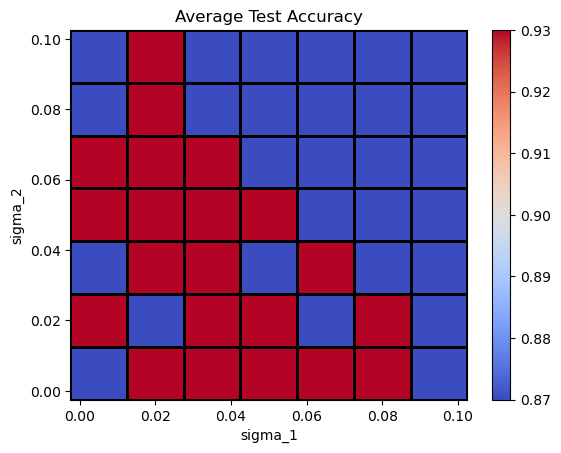

In [37]:
print(np.max(average_test_accuracy_grid_10_by_10_10_samples))
max_value=np.max(average_test_accuracy_grid_10_by_10_10_samples)
print(np.min(average_test_accuracy_grid_10_by_10_10_samples))
min_value=np.min(average_test_accuracy_grid_10_by_10_10_samples)
range_value=max_value-min_value
threshold=0.8
result_filter=average_test_accuracy_grid_10_by_10_10_samples >= threshold*range_value+min_value
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(axis_std_w1, axis_std_w2, result_filter.T, cmap ='coolwarm', vmin= 0.87, vmax=0.93, edgecolors='k')
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


In [25]:
average_test_accuracy_grid_10_by_10_10_samples >= 0.993*np.max(average_test_accuracy_grid_10_by_10_10_samples)

array([[False,  True, False, False,  True, False, False],
       [ True, False,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True, False, False, False],
       [ True,  True, False, False, False, False, False],
       [ True, False, False, False, False, False, False],
       [False,  True, False, False, False, False, False],
       [False, False, False, False, False, False, False]])

In [26]:
test1 = average_test_accuracy_grid_10_by_10_10_samples >= 0.99*np.max(average_test_accuracy_grid_10_by_10_10_samples)

test2 = np.sort(np.extract(test1, average_test_accuracy_grid_10_by_10_10_samples))

test3 = np.argwhere(average_test_accuracy_grid_10_by_10_10_samples>0.92188502)

print(test2)

[0.91696715 0.91744792 0.91758814 0.91795873 0.91813902 0.91867989
 0.91887019 0.91888021 0.91914063 0.91944111 0.9202524  0.92078325
 0.92098357 0.92127404 0.92153446 0.92188502 0.9220653  0.92230569
 0.92317708 0.92380809 0.92392829 0.92432893 0.92498998 0.92574119
 0.92582131]


In [27]:
array = []
for t1 in test3:
    tbw1_w2= (np.array(t1)+np.array([0.5,0.5]))*0.015+0.005
    array.append(tbw1_w2)

In [28]:
max_accuracy = np.max( average_test_accuracy_grid_10_by_10_10_samples)
index_max_accuracy = np.argmax( average_test_accuracy_grid_10_by_10_10_samples)
test_best_w1_w2 = np.unravel_index(index_max_accuracy, average_test_accuracy_grid_10_by_10_10_samples.shape)
test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005


In [29]:
i=0
for element in array:
    data = {}
    data['frequency'] = 65
    data['N'] = 300
    data['w1'] = element[0]/0.3445
    data['w2'] = element[1]/0.3445
    np.savez("test_accuracy_300_seed_{}.npz".format(i),**data)
    i+=1

In [30]:
data = {}
data['frequency'] = 65
data['N'] = 300
data['accuracy'] = max_accuracy
data['w1'] = test_best_w1_best_w2[0]/0.3445
data['error_bar_w1'] = 0.0075/0.3445
data['w2'] = test_best_w1_best_w2[1]/0.3445
data['error_bar_w2'] = 0.0075/0.3445
np.savez("test_accuracy_300",**data)